In [16]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import preprocessing_functions
import pycaret
from pycaret.classification import *
from scipy.stats import pearsonr
from dataprep.eda import create_report
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

Basic preprocessing actions (Fitbit)
1. Select experiment dates
2. Drop duplicates
3. Type conversion
4. One hot encoding

In [17]:
fitbit=pd.read_pickle('data/daily_fitbit_df_unprocessed.pkl')
fitbit=preprocessing_functions.fitbit_basic_preprocessing(fitbit)
fitbit=preprocessing_functions.fitbit_one_hot_encoding(fitbit)
fitbit

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
fitbit.columns

Index([                              'id',                             'date',
                    'nightly_temperature',                           'nremhr',
                                  'rmssd',                             'spo2',
              'full_sleep_breathing_rate',                     'stress_score',
                'sleep_points_percentage',       'exertion_points_percentage',
       'responsiveness_points_percentage',      'daily_temperature_variation',
                               'calories',        'filteredDemographicVO2Max',
                               'distance',                              'bpm',
                 'lightly_active_minutes',        'moderately_active_minutes',
                    'very_active_minutes',                'sedentary_minutes',
                                'scl_avg',                       'resting_hr',
                         'sleep_duration',              'minutesToFallAsleep',
                          'minutesAsleep',          

Basic preprocessing actions (Sema)
1. Group positive and negative feelings


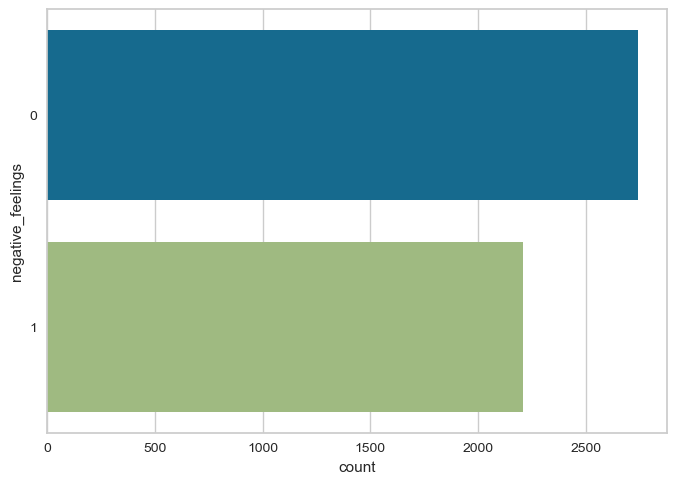

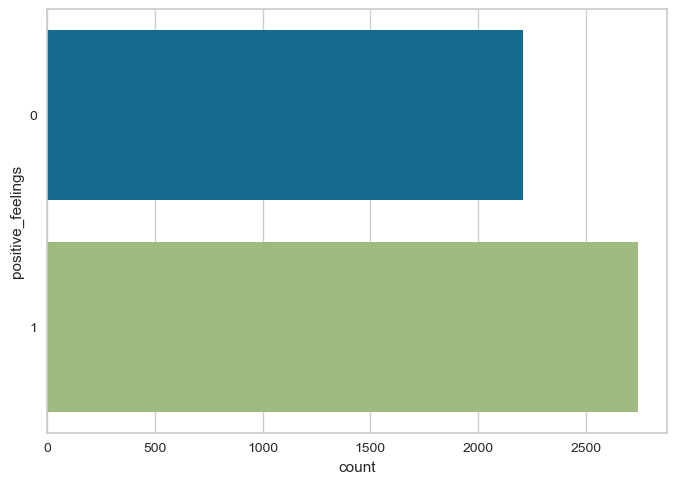

,id,date,negative_feelings,positive_feelings
0,621e2f3967b776a240c654db,2021-05-24,0,1
11,621e362467b776a2404ad513,2021-05-24,0,1
10,621e301e67b776a240608a72,2021-05-24,0,1
9,621e30e467b776a240e817c7,2021-05-24,1,0
8,621e36f967b776a240e5e7c9,2021-05-24,1,0
...,...,...,...,...
4932,621e30f467b776a240f22944,2022-01-16,0,1
4946,621e2f9167b776a240011ccb,2022-01-17,1,0
4944,621e346f67b776a24081744f,2022-01-17,1,0
4945,621e30f467b776a240f22944,2022-01-17,0,1


In [19]:
sema=pd.read_pickle('data/semas_read_from_the_base_experiment_dates.pkl')
sema = sema.sort_values(by='date', ascending=True)
sema=preprocessing_functions.sema_basic_preprocessing(sema)
sema

In [20]:
data=fitbit.merge(sema,on=['date','id'])
data.columns

Index([                              'id',                             'date',
                    'nightly_temperature',                           'nremhr',
                                  'rmssd',                             'spo2',
              'full_sleep_breathing_rate',                     'stress_score',
                'sleep_points_percentage',       'exertion_points_percentage',
       'responsiveness_points_percentage',      'daily_temperature_variation',
                               'calories',        'filteredDemographicVO2Max',
                               'distance',                              'bpm',
                 'lightly_active_minutes',        'moderately_active_minutes',
                    'very_active_minutes',                'sedentary_minutes',
                                'scl_avg',                       'resting_hr',
                         'sleep_duration',              'minutesToFallAsleep',
                          'minutesAsleep',          

In [21]:
data = data.drop(columns=['positive_feelings'])

In [22]:
data = preprocessing_functions.date_engineering(data)
data.columns

Index([                              'id',              'nightly_temperature',
                                 'nremhr',                            'rmssd',
                                   'spo2',        'full_sleep_breathing_rate',
                           'stress_score',          'sleep_points_percentage',
             'exertion_points_percentage', 'responsiveness_points_percentage',
            'daily_temperature_variation',                         'calories',
              'filteredDemographicVO2Max',                         'distance',
                                    'bpm',           'lightly_active_minutes',
              'moderately_active_minutes',              'very_active_minutes',
                      'sedentary_minutes',                          'scl_avg',
                             'resting_hr',                   'sleep_duration',
                    'minutesToFallAsleep',                    'minutesAsleep',
                           'minutesAwake',          

In [23]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

<AxesSubplot: xlabel='count', ylabel='negative_feelings'>

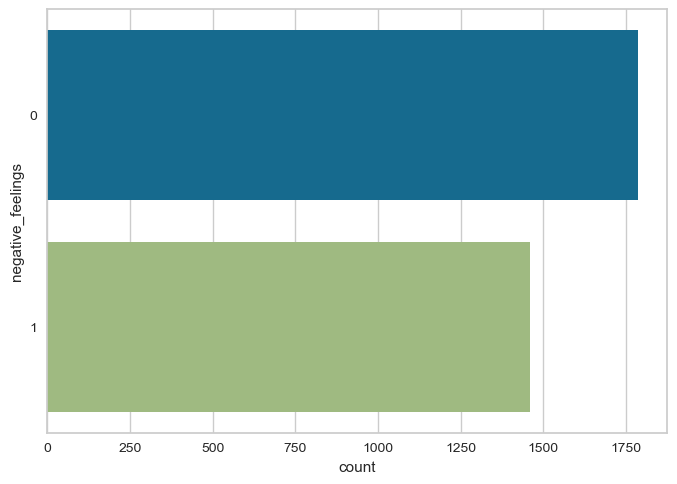

In [24]:
sns.countplot(y="negative_feelings", data=train_data)

<AxesSubplot: xlabel='count', ylabel='negative_feelings'>

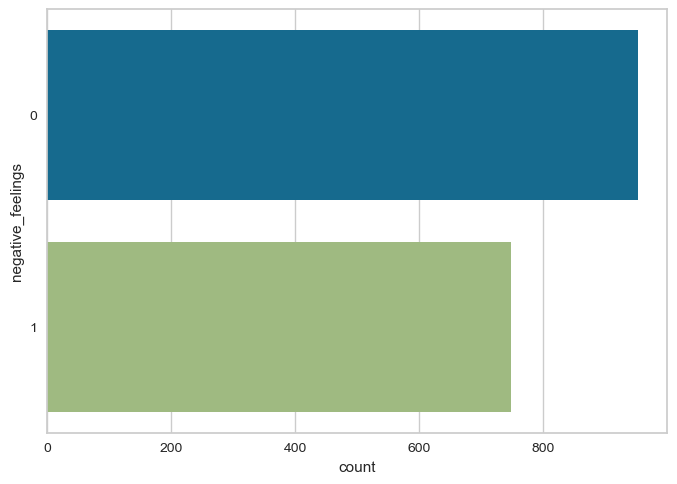

In [25]:
sns.countplot(y="negative_feelings", data=test_data)

In [26]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [12]:
grid = setup(data=train_data, target='negative_feelings', silent=True, session_id=123, fold_strategy='groupkfold', 
          fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_feelings
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3245, 66)"
5,Missing Values,True
6,Numeric Features,42
7,Categorical Features,23
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='negative_feelings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_

In [13]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5501,0.5274,0.0000,0.0000,0.0000,0.0000,0.0000,0.9233
dummy,Dummy Classifier,0.5501,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0467
rf,Random Forest Classifier,0.5442,0.5283,0.3170,0.4919,0.3794,0.0522,0.0552,0.1500
gbc,Gradient Boosting Classifier,0.5365,0.5186,0.3412,0.4844,0.3918,0.0437,0.0464,0.3567
ada,Ada Boost Classifier,0.5334,0.5076,0.3680,0.4781,0.4109,0.0376,0.0393,0.1333
et,Extra Trees Classifier,0.5307,0.5225,0.2844,0.4676,0.3400,0.0229,0.0243,0.1433
lightgbm,Light Gradient Boosting Machine,0.5297,0.5248,0.4116,0.4752,0.4324,0.0435,0.0441,0.3133
knn,K Neighbors Classifier,0.5248,0.5142,0.4298,0.4685,0.4475,0.0326,0.0326,0.6300
nb,Naive Bayes,0.5119,0.5280,0.5491,0.4708,0.4980,0.0336,0.0322,0.6000
dt,Decision Tree Classifier,0.5113,0.5073,0.4412,0.4541,0.4471,0.0074,0.0074,0.0600


create_model_container: 14
master_model_container: 14
display_container: 2
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
compare_models() succesfully completed......................................


In [28]:
scaler = MinMaxScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data.values), columns=train_data.columns, index=train_data.index)
train_data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,negative_feelings,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
1,0.795701,0.768424,0.352489,0.447059,0.355705,0.000000,0.000000,0.000,0.000000,0.162873,...,0.0,0.0,2.775558e-16,0.500000,0.564813,0.005131,1.998401e-15,1.000000,1.000000,0.574623
2,0.795701,0.768424,0.352489,0.447059,0.355705,0.000000,0.000000,0.000,0.000000,0.162873,...,0.0,0.0,2.775558e-16,0.500000,0.564813,0.005131,1.998401e-15,1.000000,1.000000,0.574623
3,0.795701,0.768424,0.352489,0.447059,0.355705,0.000000,0.000000,0.000,0.000000,0.162873,...,0.0,0.0,2.775558e-16,0.500000,0.564813,0.005131,1.998401e-15,1.000000,1.000000,0.574623
5,NaN,0.685912,0.571475,0.458824,0.503356,0.902174,0.933333,0.775,0.827586,0.261356,...,0.0,1.0,2.775558e-16,0.500000,0.564813,0.005131,1.998401e-15,1.000000,1.000000,0.574623
6,NaN,0.685912,0.571475,0.458824,0.503356,0.902174,0.933333,0.775,0.827586,0.261356,...,0.0,1.0,2.775558e-16,0.500000,0.564813,0.005131,1.998401e-15,1.000000,1.000000,0.574623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0.677393,0.534627,0.580820,0.576471,0.436242,0.826087,0.633333,0.825,0.827586,0.316018,...,NaN,0.0,1.000000e+00,0.099031,0.740384,0.449351,1.998401e-15,0.801938,0.927199,0.000000
4940,0.677393,0.534627,0.580820,0.576471,0.436242,0.826087,0.633333,0.825,0.827586,0.316018,...,NaN,1.0,1.000000e+00,0.099031,0.740384,0.449351,1.998401e-15,0.801938,0.927199,0.000000
4941,0.642038,0.822749,0.238049,NaN,0.610738,0.782609,0.833333,0.625,0.758621,0.116024,...,NaN,1.0,1.000000e+00,0.500000,0.879717,0.350126,1.998401e-15,1.000000,0.813808,0.020417
4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.000000e+00,0.500000,0.879717,0.350126,1.998401e-15,1.000000,0.813808,0.020417


In [29]:
grid = setup(data=train_data, target='negative_feelings', silent=True, session_id=123, fold_strategy='groupkfold', 
          fold=3,  fold_groups=fold_groups, test_data=test_data)

PyCaret Supervised Module
ML Usecase: classification
version 2.3.10
Initializing setup()
setup(target=negative_feelings, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=      nightly_temperature  nremhr   rmssd  spo2  full_sleep_breathing_rate  \
0               34.710232     NaN     NaN   NaN                        NaN   
4                     NaN  69.820  28.594   NaN                     

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:24:55
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Importing libraries
Copying data for preprocessing
Declaring preprocessing parameters
Creating preprocessing pipeline
Preprocessing pipeline created successfully
(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
Creating global containers
Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


ValueError: y contains previously unseen labels: '0'